<a href="https://colab.research.google.com/github/ShifaZahra123/ML_INTERNSHIP/blob/main/Magic%2BGamma%2BTelescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [9]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) # Assign labels to columns of this dataset
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [10]:
df["class"].unique() # g for gamma nad h for hardons

array(['g', 'h'], dtype=object)

In [11]:
# convert class data type object to numbers
df["class"] = (df["class"] == 'g').astype(int)

In [12]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# 10 features are used to tain the model for predicting target variable


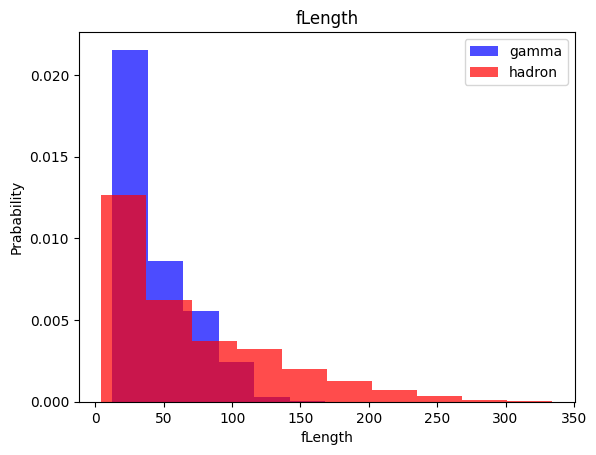

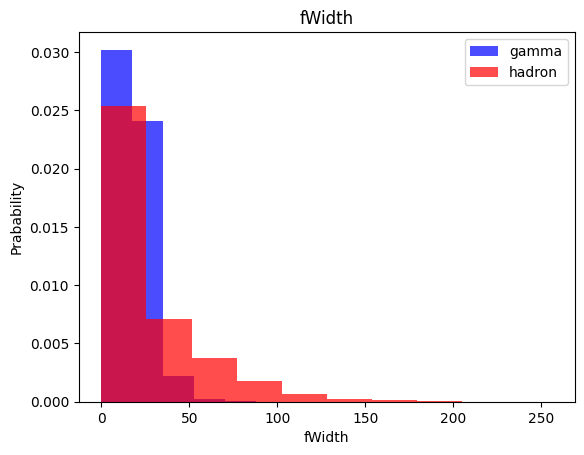

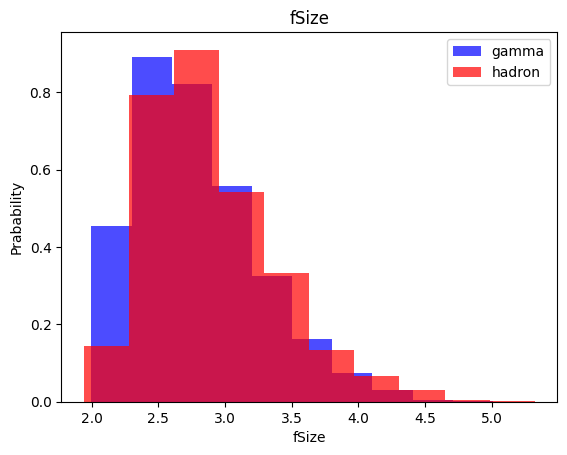

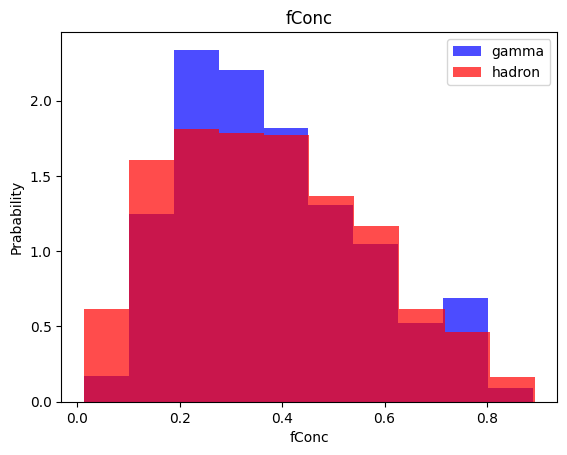

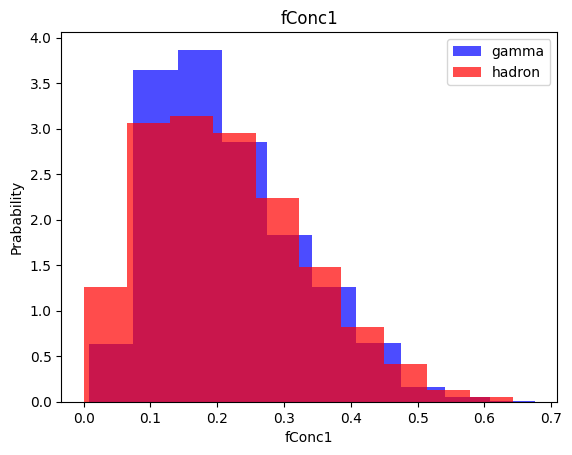

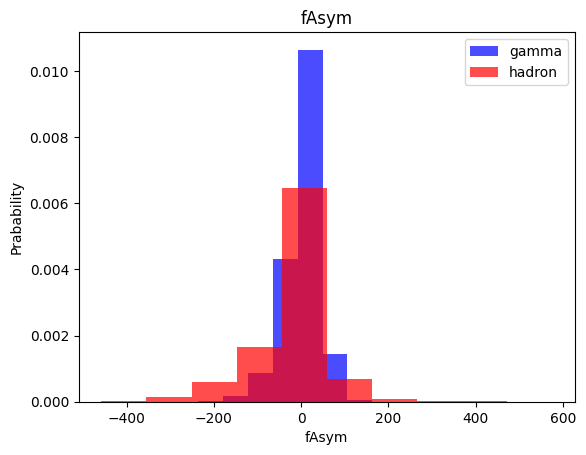

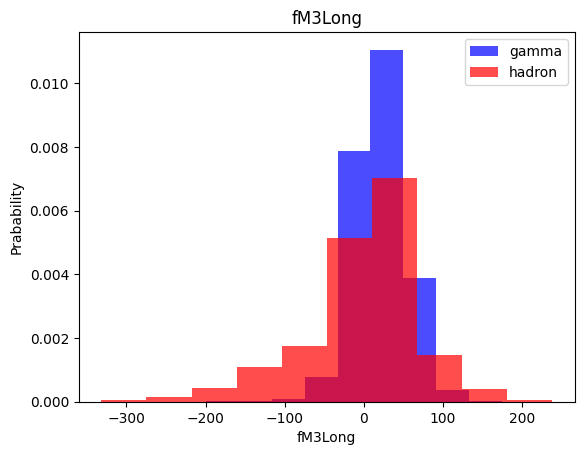

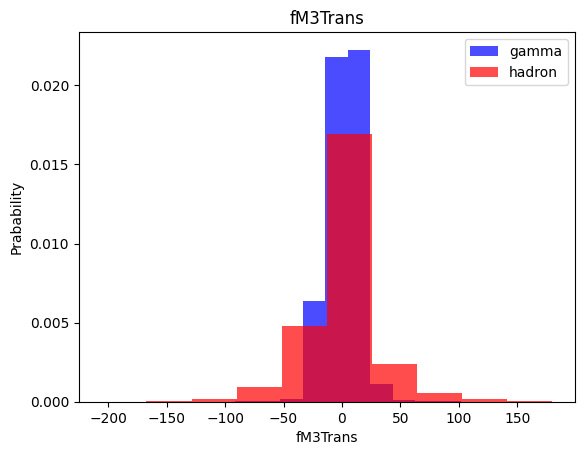

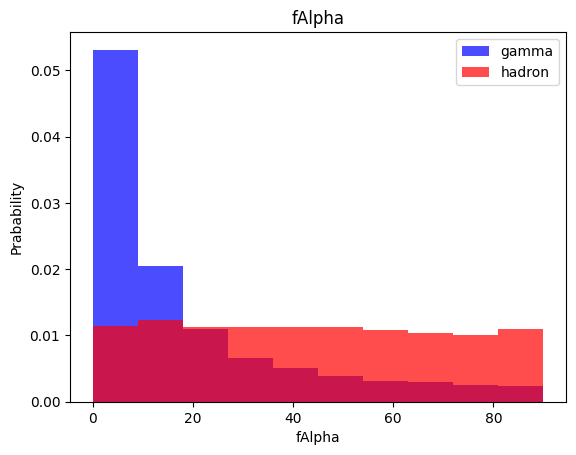

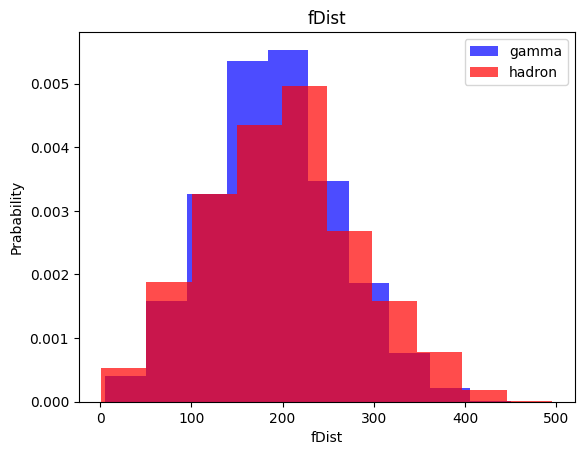

In [13]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Prabability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation, Test Datasets

In [14]:
# shuffle the data
# split 60% for training data, 20% (everything b/w 60 & 80%) for validation data
# 20% (everything b/w 80 & 100%) for testing data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [15]:
# Scale the data, some values like flenth, fwidth are lare while other are so smale in 4. some numbers or even 0. sometime which affects the result so scaled it

def scale_dataset(dataframe, oversample=False):
  # X contains all the feature columns (except the last column, which is the target)
  X = dataframe[dataframe.columns[:-1]].values
  # y contains the target column (the last column)
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Take less class and keep samplin from there to increase the size of our dataset of that smaller class so that they now match
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # FOR combine X with y, makes y 2D as of X, by reshpe(-1,1), the last one is used to make it column vector
  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [16]:
# Unequal Datset (gamma has more rows(data), as compared to hadron (outliers))
print(len(train[train["class"]==1]))  # gamma
print(len(train[train["class"]==0]))  # hadron

7367
4045


In [17]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [18]:
len(y_train)

14734

In [19]:
sum(y_train == 1)

np.int64(7367)

In [20]:
sum(y_train == 0)

np.int64(7367)

# Now both gamma and hadron have same number of values

In [21]:
# Donot oversample or make same number of values to gamma and hadron in valid and test dataset beacause it's unseen data and used for checking model accuracy
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**K-Nearest Neighbour ML Classification Algorithm**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn_model.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1358
           1       0.85      0.87      0.86      2446

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



**Naive Bayes**

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [29]:
y_pred = nb_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred)) # Model is not good as compared to K-Nearest Neighbor Algorithm w.r.t to this dataset

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1358
           1       0.73      0.89      0.80      2446

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [33]:
y_pred = lg_model.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred)) # Model is better than Naive Bayes but not good as KNN w.r.t this dataset

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1358
           1       0.84      0.81      0.83      2446

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



**Support Vector Machine (SVM)**

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [37]:
y_pred = svm_model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred)) # Model is best than other previous algoirthm w.r.t this dataset, nott good with outliers in the dataset

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1358
           1       0.89      0.90      0.89      2446

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



**Neural Network**

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [40]:
def plot_history(history):
  # plot on my axis
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 8))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [41]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
 nn_model = tf.keras.Sequential([
     tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)), # 1st layer
     tf.keras.layers.Dropout(dropout_prob),# help prevent overfitting
     tf.keras.layers.Dense(32, activation='relu'), # 2nd layer
     tf.keras.layers.Dropout(dropout_prob),# help prevent overfitting
     tf.keras.layers.Dense(1, activation= 'sigmoid') # output layer, projectring prediction as 0 & 1, just like logistic regression
 ])

 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

 history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

 return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


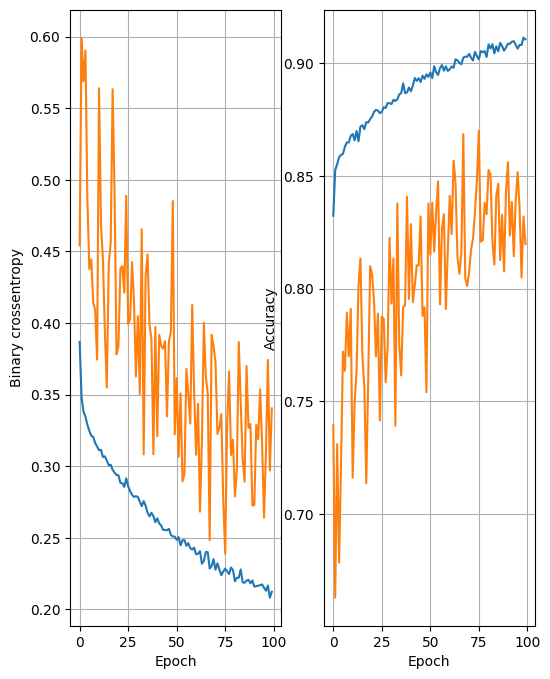

16 nodes, dropout 0, lr 0.01, batch size 64


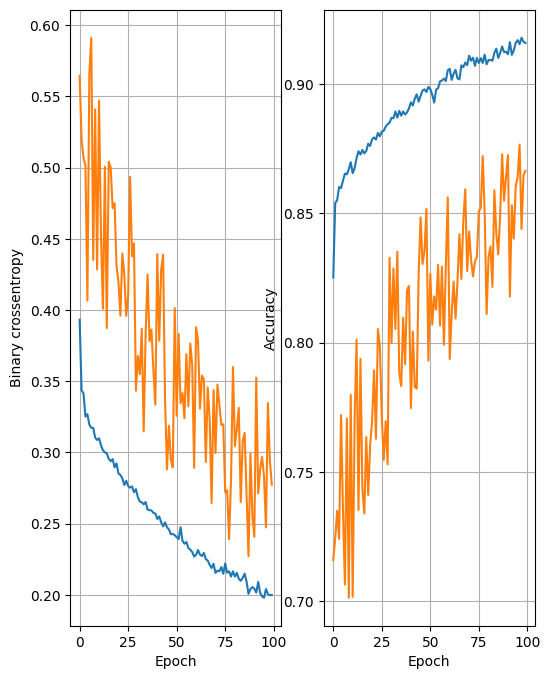

16 nodes, dropout 0, lr 0.01, batch size 128


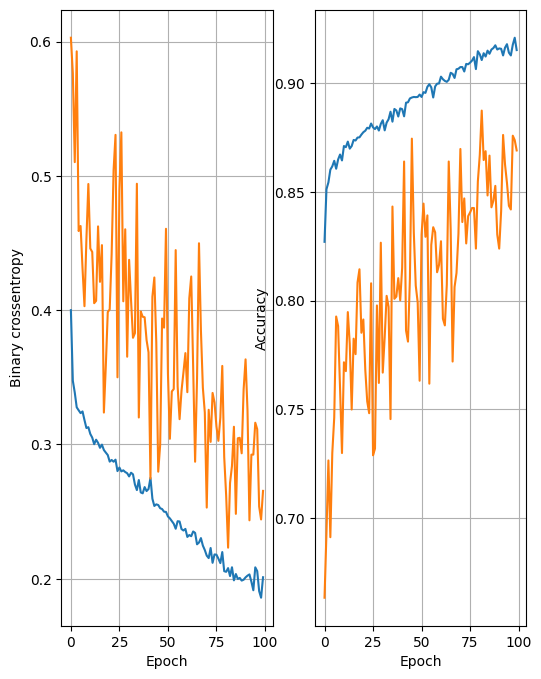

16 nodes, dropout 0, lr 0.005, batch size 32


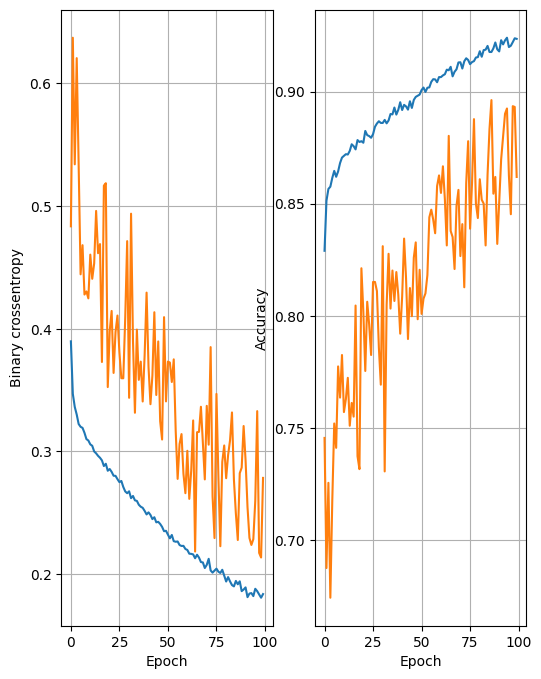

16 nodes, dropout 0, lr 0.005, batch size 64


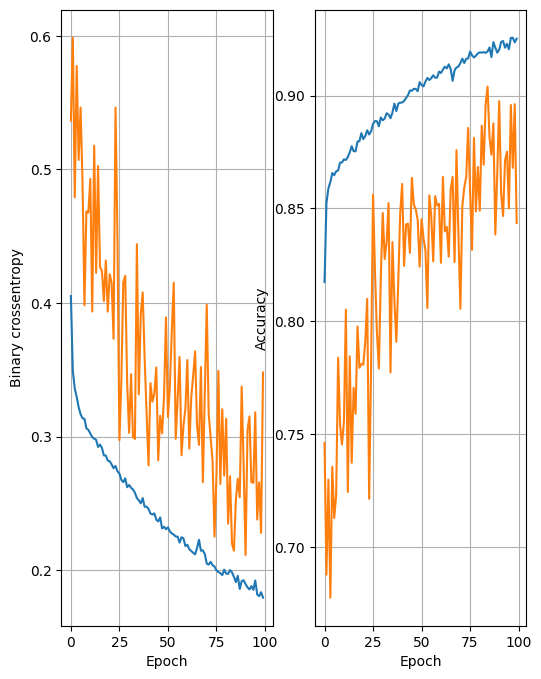

16 nodes, dropout 0, lr 0.005, batch size 128


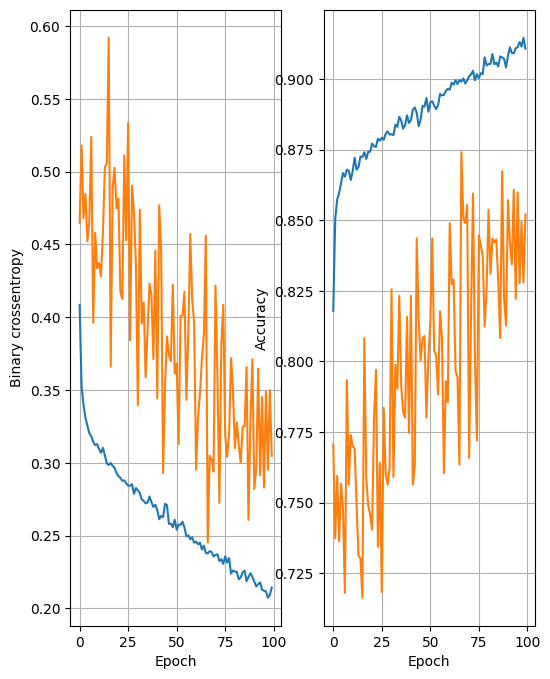

16 nodes, dropout 0, lr 0.001, batch size 32


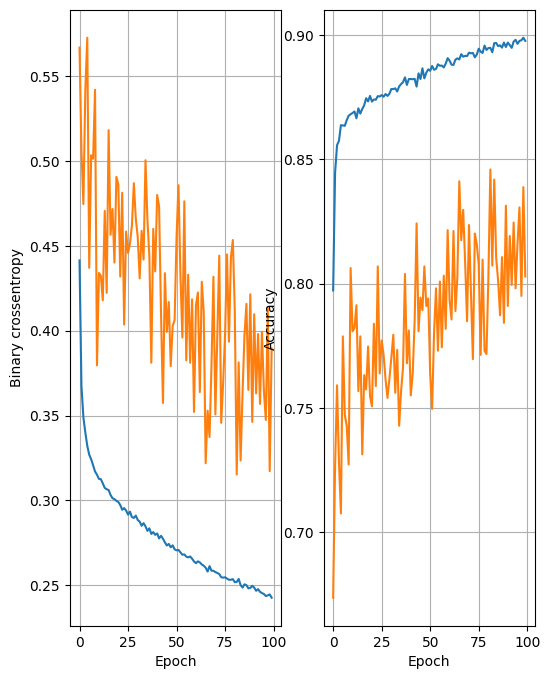

16 nodes, dropout 0, lr 0.001, batch size 64


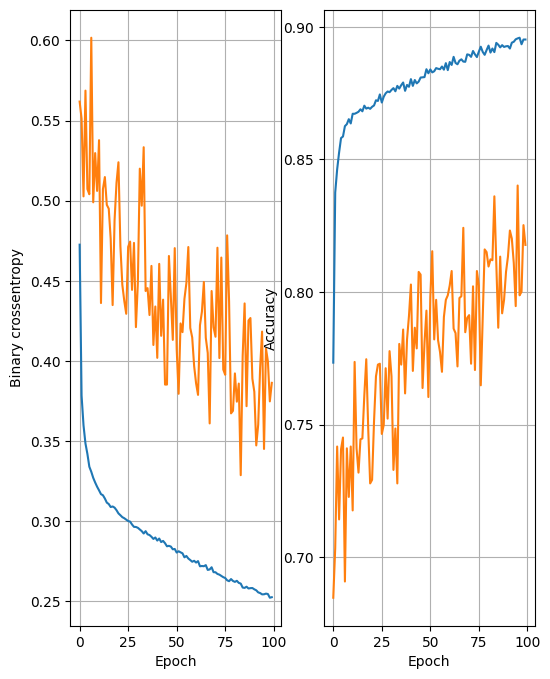

16 nodes, dropout 0, lr 0.001, batch size 128


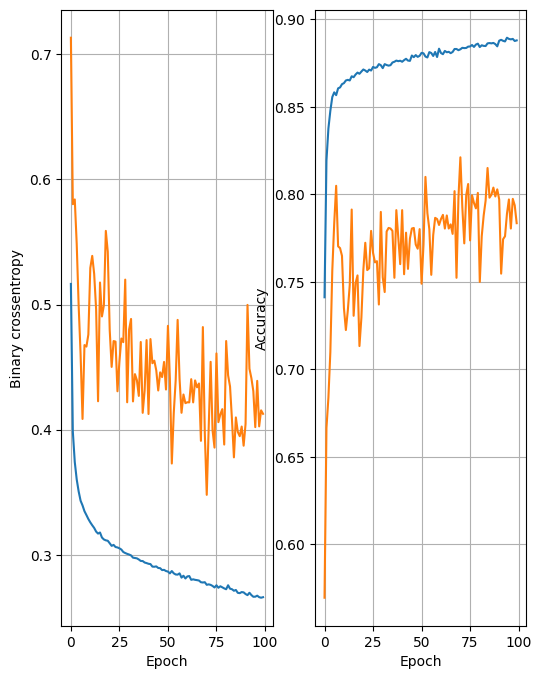

16 nodes, dropout 0.2, lr 0.01, batch size 32


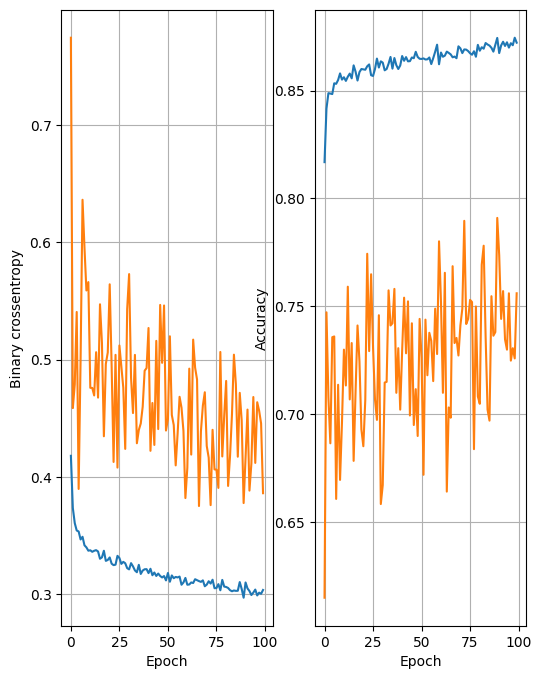

16 nodes, dropout 0.2, lr 0.01, batch size 64


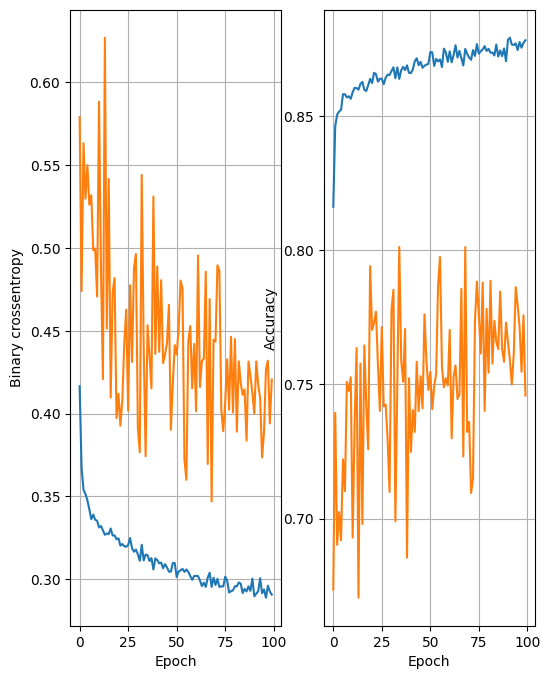

16 nodes, dropout 0.2, lr 0.01, batch size 128


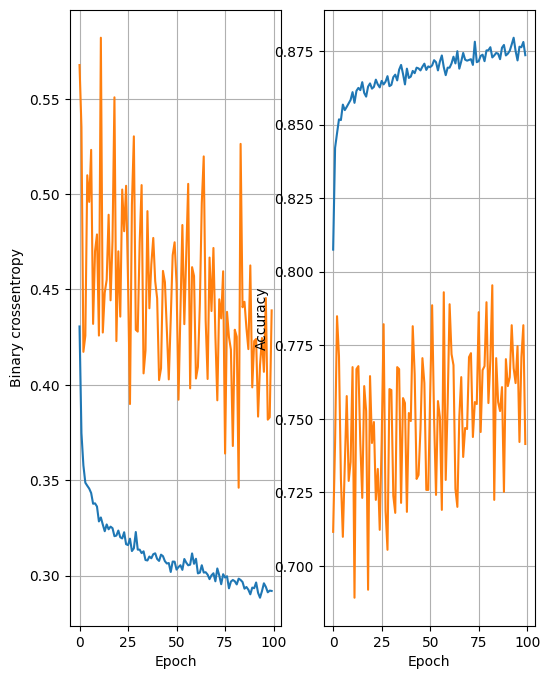

16 nodes, dropout 0.2, lr 0.005, batch size 32


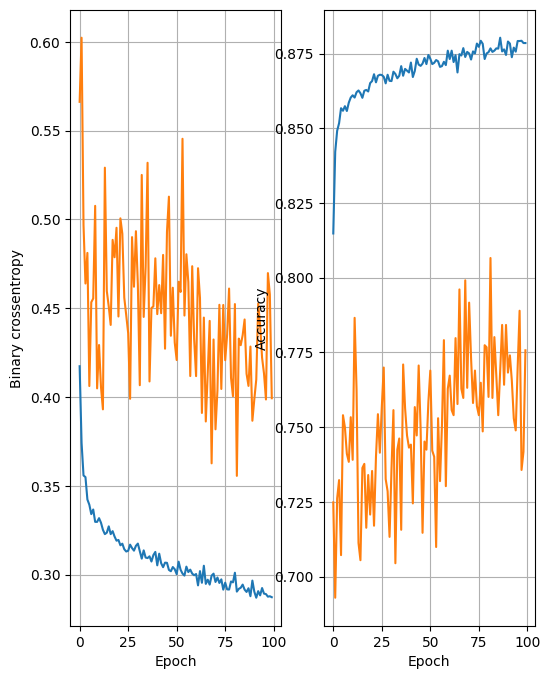

16 nodes, dropout 0.2, lr 0.005, batch size 64


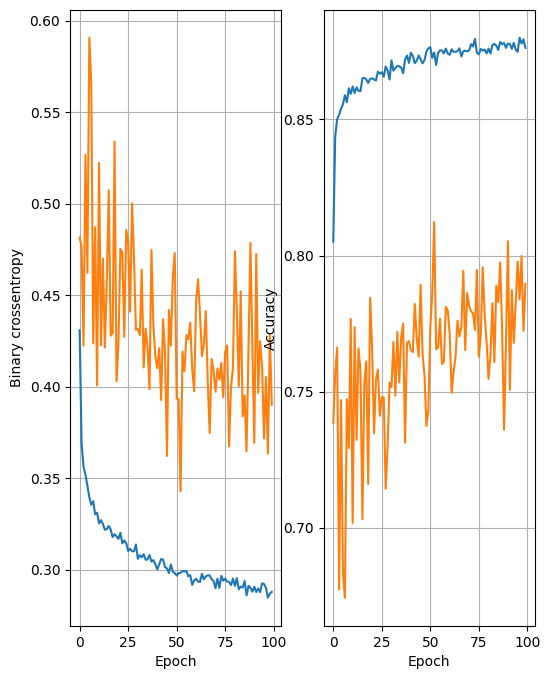

16 nodes, dropout 0.2, lr 0.005, batch size 128


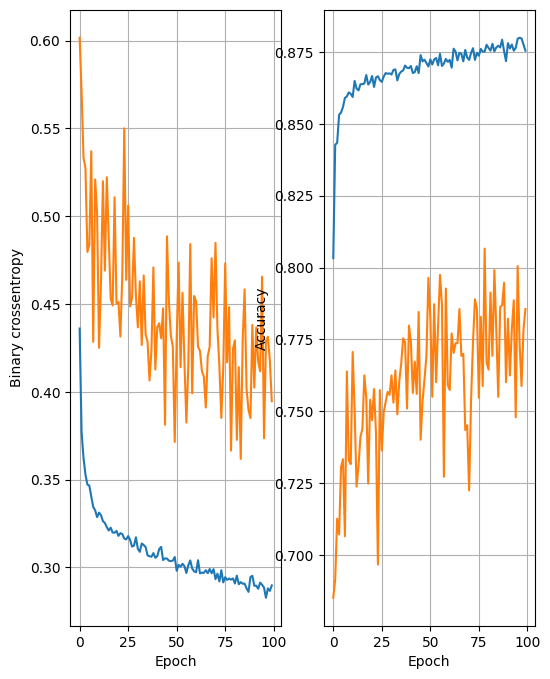

16 nodes, dropout 0.2, lr 0.001, batch size 32


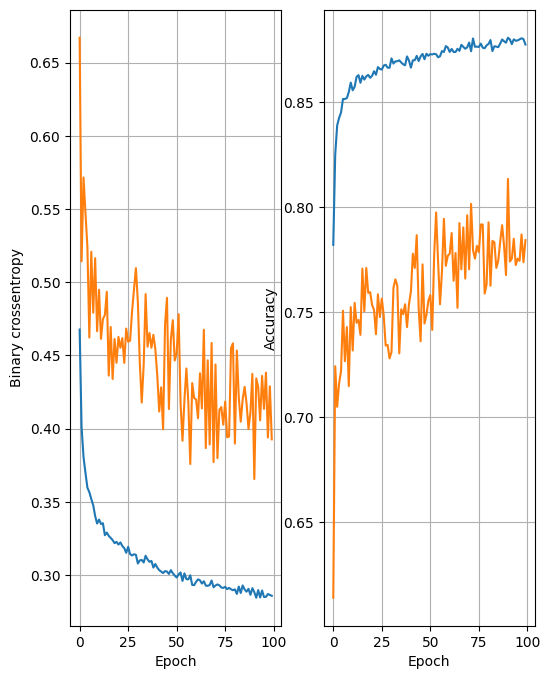

16 nodes, dropout 0.2, lr 0.001, batch size 64


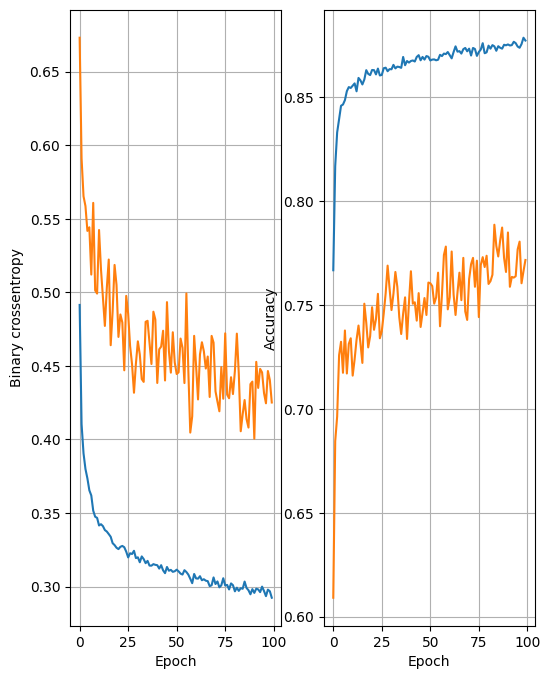

16 nodes, dropout 0.2, lr 0.001, batch size 128


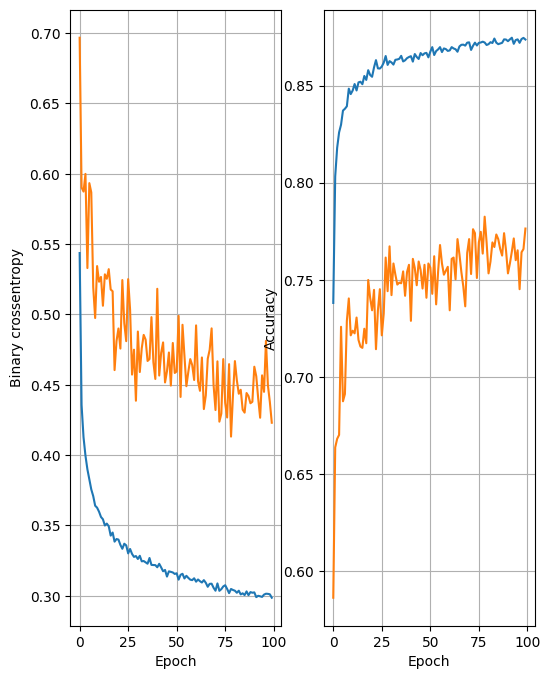

64 nodes, dropout 0, lr 0.01, batch size 32


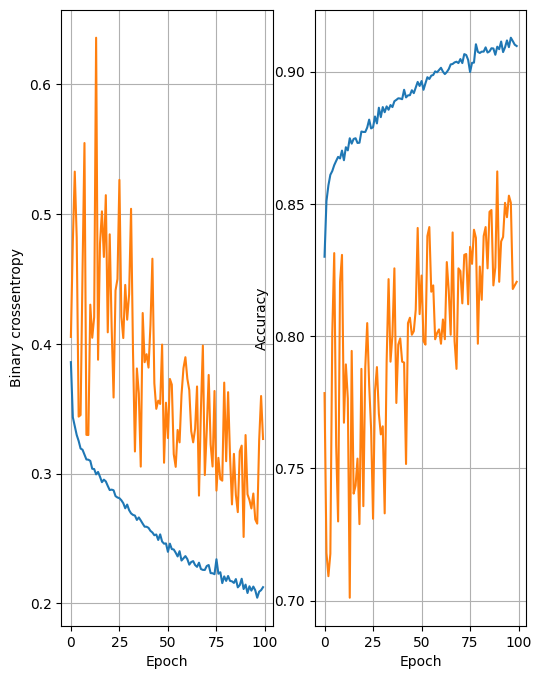

64 nodes, dropout 0, lr 0.01, batch size 64


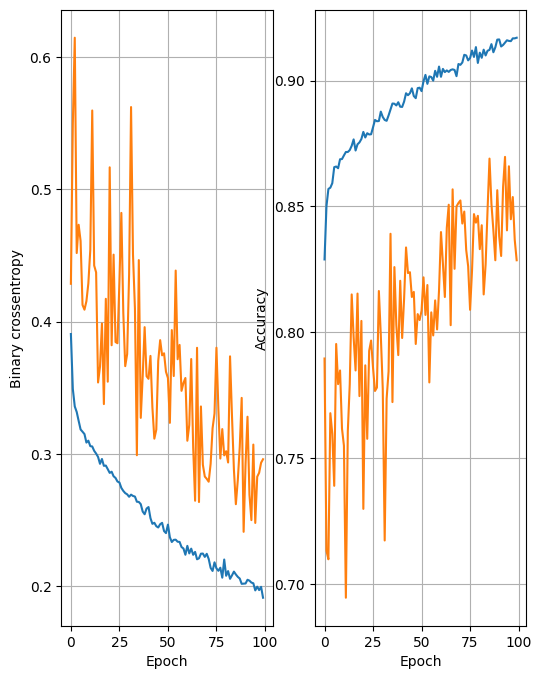

64 nodes, dropout 0, lr 0.01, batch size 128


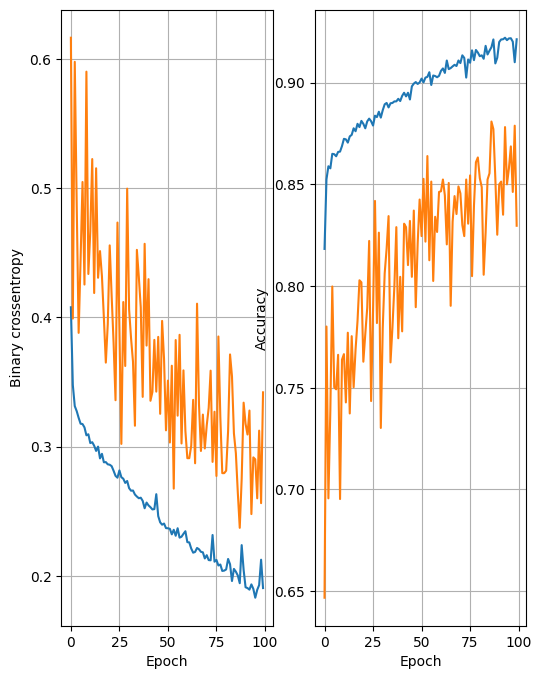

64 nodes, dropout 0, lr 0.005, batch size 32


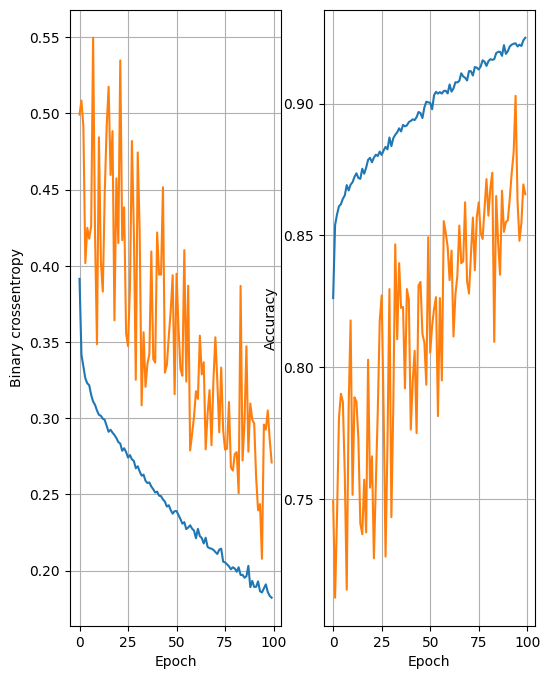

64 nodes, dropout 0, lr 0.005, batch size 64


In [ ]:
# Validation_Split: Fraction of trainin data to be used as validation data
# E.g; If this is pint 2, then leave 20% out and test how the model performs on that 20%
least_val_loss = float("inf") #infinity
least_loss_model = None
epochs=100
for num_nodes in [16, 64, 32]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        # The history object is returned by train_model, so plot it here
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid, verbose=0)[0] # Access the loss value from the list
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y)